In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pygwalker as pyg
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data Prep and exploration

In [393]:
data = "https://raw.githubusercontent.com/CPHRasmusOlsson/BusinessIntelligence/refs/heads/main/MiniProj4/high_diamond_ranked_10min.csv"
df = pd.read_csv(data)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [397]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [399]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [401]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


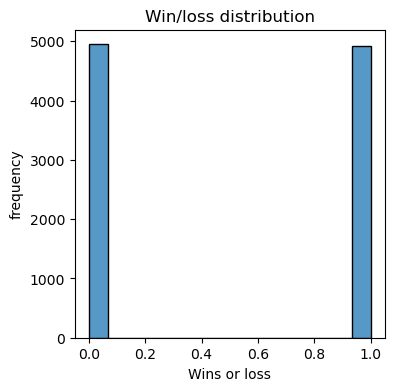

In [404]:
plt.figure(figsize=(4,4))
sns.histplot(df['blueWins'])
plt.title('Win/loss distribution')
plt.xlabel('Wins or loss')
plt.ylabel('frequency')
plt.show()

Win/loss distribution is close to 50%

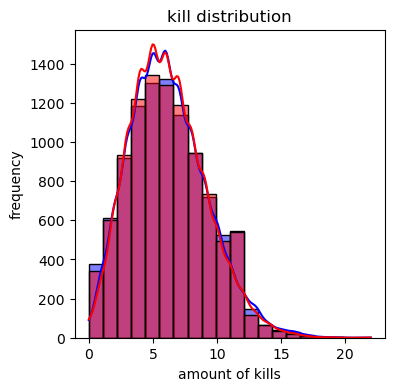

In [407]:
plt.figure(figsize=(4,4))
sns.histplot(df['blueKills'], bins=20, kde=True, color='blue', label='blue team kills')
sns.histplot(df['redKills'], bins=20, kde=True, color='red', label='red team kills')
plt.title('kill distribution')
plt.xlabel('amount of kills')
plt.ylabel('frequency')
plt.show()

Red team and Blue team has a very similar kill distribution 

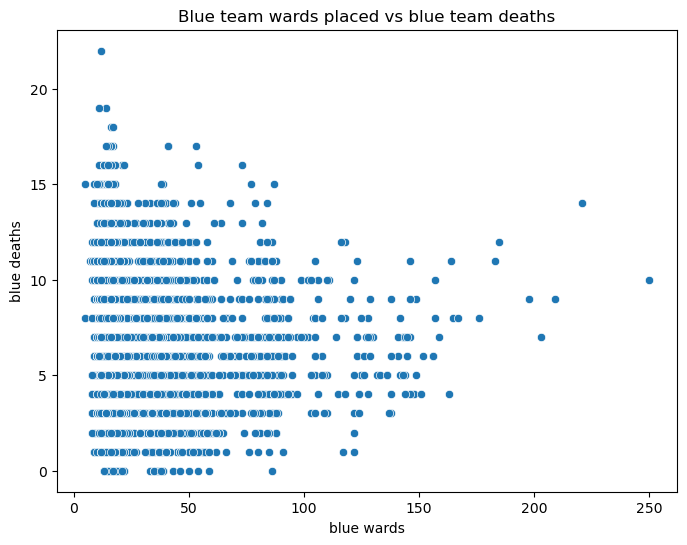

In [410]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='blueWardsPlaced', y='blueDeaths', data=df)
plt.title('Blue team wards placed vs blue team deaths')
plt.xlabel('blue wards')
plt.ylabel('blue deaths')
plt.show()

the amount of deaths generally falls the more you ward

In [413]:
df = df.drop(['gameId'],axis=1)

In [415]:
#removing all "red" columns, as we are focusing on what blue should focus on to win
df_filtered = df.loc[:, ~df.columns.str.startswith('red')]


In [417]:
## making function able to take care of outliers by using Interquartile Range to remove outliers
def iqr_remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

In [419]:
df_cleaned = iqr_remove_outliers(df_filtered)
df_cleaned.shape

(6033, 20)

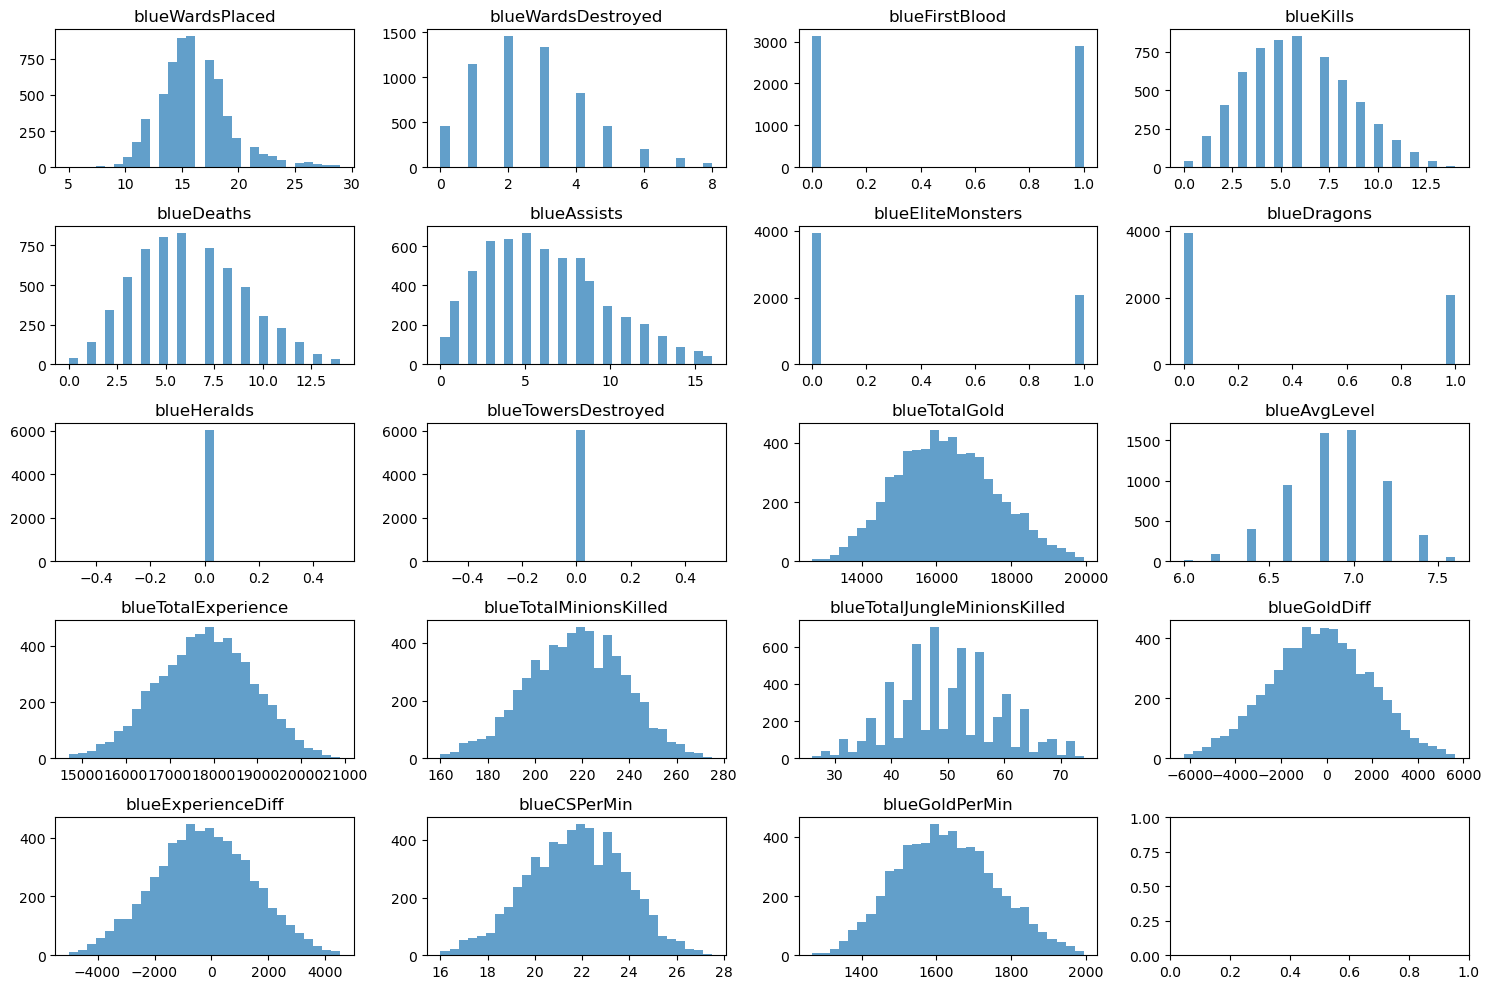

In [421]:
feature_columns = [
    'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 
    'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
    'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 
    'blueTotalExperience', 'blueTotalMinionsKilled', 
    'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
    'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin'
]
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    axes[i].hist(df_cleaned[col], bins=30, alpha=0.7)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

most of the columns seem to be normalized

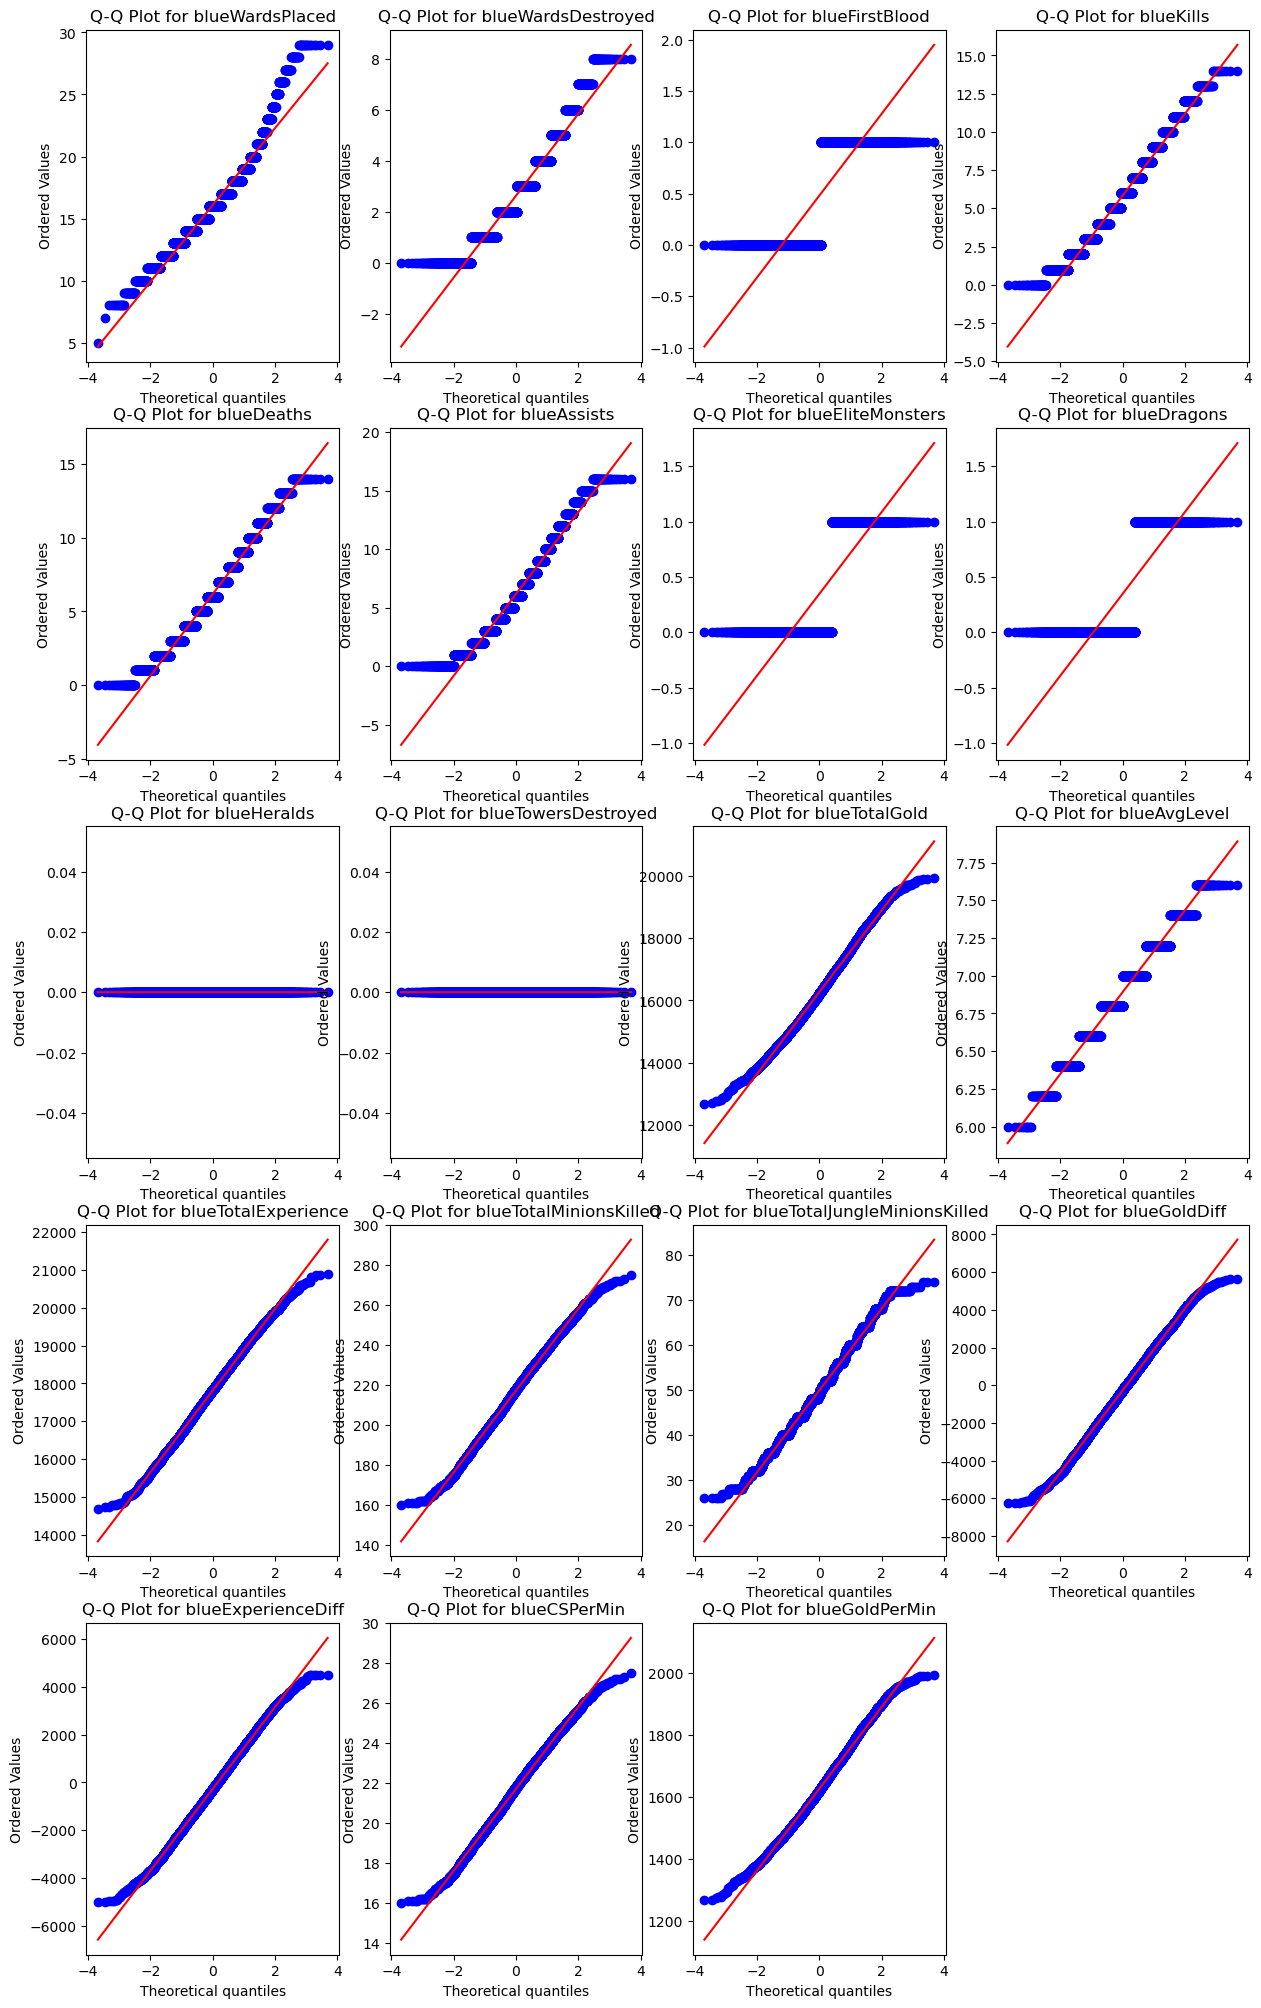

In [423]:
plt.figure(figsize=(15, 25))

# Iterate over each feature column to create Q-Q plots
for i, col in enumerate(feature_columns, 1):
    plt.subplot(5, 4, i)  # Create a 6x3 grid of subplots
    stats.probplot(df_cleaned[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')

In [424]:
df_cleaned.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
5,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9
6,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4


In [425]:
#as these columns have a close to normalized spread i use the StandardScaler
scaler = StandardScaler()
scaled_columns = ['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueGoldPerMin']
df_scaled = df_cleaned
df_scaled[feature_columns] = scaler.fit_transform(df_cleaned[feature_columns])

In [426]:
df_scaled.head()


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,3.747146,-0.386818,1.040087,1.171505,-0.065594,1.355194,-0.728581,-0.728581,0.0,0.0,0.714624,-1.046638,-0.716514,-1.083305,-1.525217,0.423870,0.149381,-1.083305,0.714624
1,0,-1.291714,-0.991240,-0.961458,-0.306704,-0.422108,-0.332411,-0.728581,-0.728581,0.0,0.0,-1.177189,-1.046638,-1.431770,-2.109582,-0.758451,-1.209888,-0.528916,-2.109582,-1.177189
2,0,-0.346928,-1.595661,-0.961458,0.432400,1.716975,-0.613679,1.372532,1.372532,0.0,0.0,-0.116168,-1.766716,-1.472430,-1.523138,-0.429837,-0.411183,-0.447404,-1.523138,-0.116168
5,1,0.597858,-1.595661,-0.961458,-0.306704,-1.135136,-0.051144,1.372532,1.372532,0.0,0.0,-0.278237,0.393519,0.320329,0.382806,-0.867989,0.449175,0.212844,0.382806,-0.278237
6,1,0.597858,0.217604,1.040087,0.432400,-0.065594,0.230124,1.372532,1.372532,0.0,0.0,0.460161,-0.326560,-0.783050,0.382806,0.336930,1.237299,1.064063,0.382806,0.460161


In [428]:
correlation_matrix = df_scaled.corr()

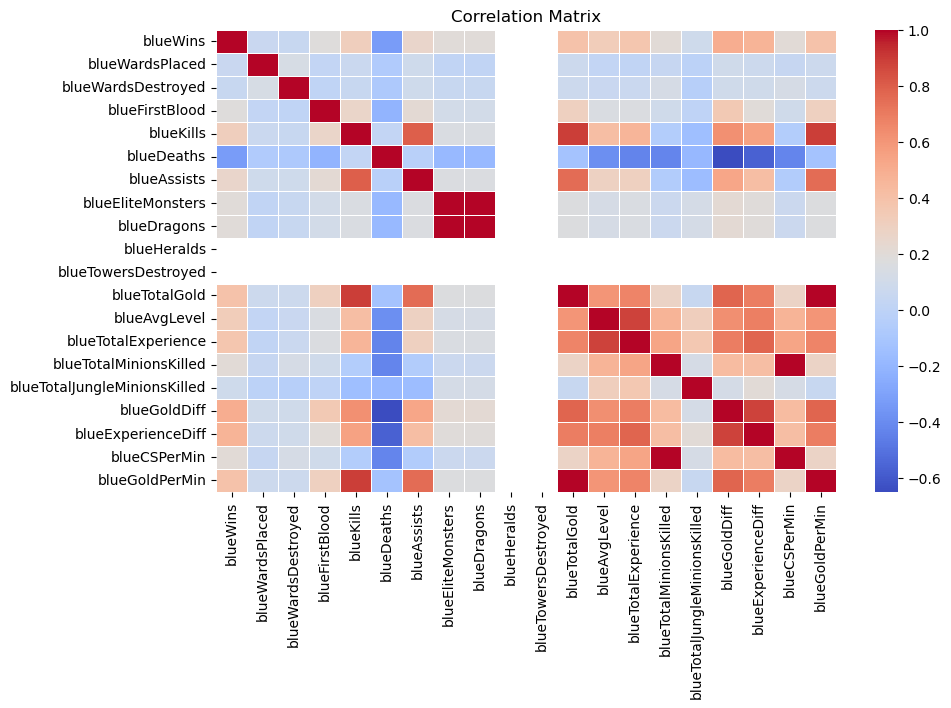

In [429]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

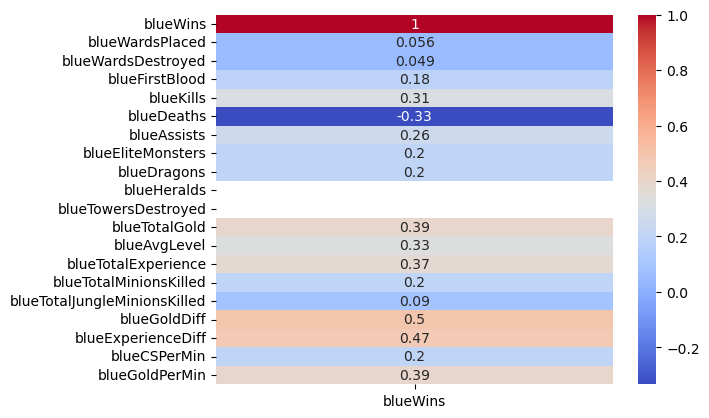

In [430]:
correlation_matrix_wins = df_scaled.corr()
sns.heatmap(correlation_matrix_wins[['blueWins']],annot=True,cmap='coolwarm')

In [432]:
high_corr_columns = correlation_matrix['blueWins'][abs(correlation_matrix['blueWins']) > 0.3].index.tolist()

In [433]:
df_final = df_scaled[high_corr_columns]

In [434]:
df_final.head()

,blueWins,blueKills,blueDeaths,blueTotalGold,blueAvgLevel,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin
0,0,1.171505,-0.065594,0.714624,-1.046638,-0.716514,0.423870,0.149381,0.714624
1,0,-0.306704,-0.422108,-1.177189,-1.046638,-1.431770,-1.209888,-0.528916,-1.177189
2,0,0.432400,1.716975,-0.116168,-1.766716,-1.472430,-0.411183,-0.447404,-0.116168
5,1,-0.306704,-1.135136,-0.278237,0.393519,0.320329,0.449175,0.212844,-0.278237
6,1,0.432400,-0.065594,0.460161,-0.326560,-0.783050,1.237299,1.064063,0.460161


## Data modeling

In [436]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import statsmodels.api as sm
#from keras.models import Sequential
#from keras.layers import Dense

In [437]:
X = df_final.drop('blueWins', axis=1)
y = df_final['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [438]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [439]:
y_pred = nb_model.predict(X_test)

In [440]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[453 158]
 [190 406]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       611
           1       0.72      0.68      0.70       596

    accuracy                           0.71      1207
   macro avg       0.71      0.71      0.71      1207
weighted avg       0.71      0.71      0.71      1207


Accuracy Score:
 0.7116818558409279


In [441]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [447]:
y_tree_pred = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_tree_pred))
print("\nClassification Report:\n", classification_report(y_test, y_tree_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_tree_pred))

Confusion Matrix:
 [[410 201]
 [236 360]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65       611
           1       0.64      0.60      0.62       596

    accuracy                           0.64      1207
   macro avg       0.64      0.64      0.64      1207
weighted avg       0.64      0.64      0.64      1207


Accuracy Score:
 0.6379453189726595


In [448]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators (default is 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [450]:
y_rf_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_rf_pred))

Confusion Matrix:
 [[472 139]
 [212 384]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       611
           1       0.73      0.64      0.69       596

    accuracy                           0.71      1207
   macro avg       0.71      0.71      0.71      1207
weighted avg       0.71      0.71      0.71      1207


Accuracy Score:
 0.7091963545981773


In [461]:
importances = rf_model.feature_importances_

# Combine the feature names and importance values into a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
5         blueGoldDiff    0.229440
6   blueExperienceDiff    0.173919
2        blueTotalGold    0.147307
7       blueGoldPerMin    0.138891
4  blueTotalExperience    0.138356
1           blueDeaths    0.073841
0            blueKills    0.056158
3         blueAvgLevel    0.042088


In [463]:
#model = Sequential()
#model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))  # Binary classification output

In [464]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [465]:
y_log_pred = log_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_log_pred))
print("\nClassification Report:\n", classification_report(y_test, y_log_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_log_pred))


Confusion Matrix:
 [[486 125]
 [202 394]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       611
           1       0.76      0.66      0.71       596

    accuracy                           0.73      1207
   macro avg       0.73      0.73      0.73      1207
weighted avg       0.73      0.73      0.73      1207


Accuracy Score:
 0.7290803645401823


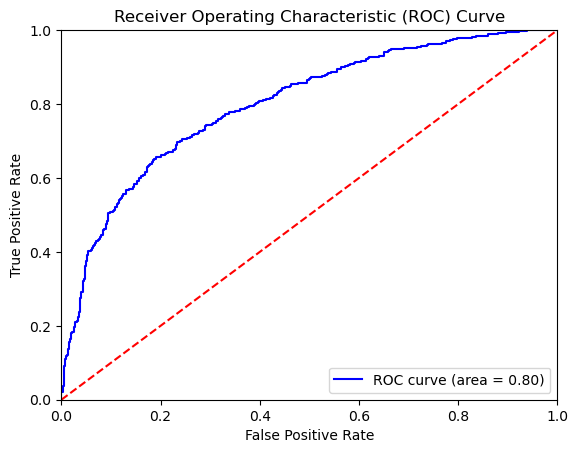

In [468]:
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [471]:
X_const = sm.add_constant(X)

# Fit logistic regression model
logit_model_stat = sm.Logit(y, X_const).fit()
print(logit_model_stat.summary())

Optimization terminated successfully.
         Current function value: 0.545260
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:                 6033
Model:                          Logit   Df Residuals:                     6025
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.2105
Time:                        09:30:11   Log-Likelihood:                -3289.6
converged:                       True   LL-Null:                       -4166.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1929      0.030     -6.394      0.000      -0.252      -0.134
b

As seen in the coefficients, blueGoldDiff has the highest impact on blue teams chances of winning, so my first hypothesis is correct.
My second hypothesis that Kills matter more (positively) than deaths do (negatively) was incorrect.
And my 3rd hypothesis that having a higher average level influences the chances to win in a meaningful way can be seen as blueExperienceDiff has a fairly high coefficient

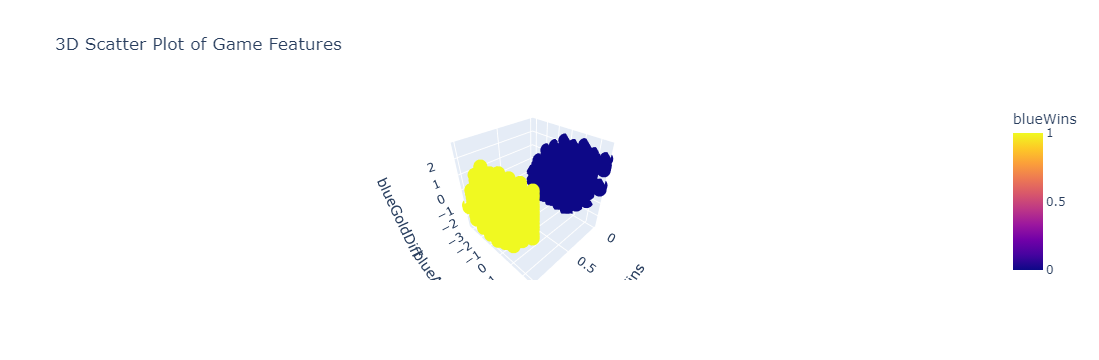

In [477]:
import plotly.express as px

fig = px.scatter_3d(df_final, x='blueWins', y='blueAvgLevel', z='blueGoldDiff', 
                    color='blueWins', title='3D Scatter Plot of Game Features')
fig.show()